# Projeto K-Means - Introdução

Neste trabalho pretendo desenvolver todo o processo de implementação de um algoritmo de segmentação (ou agrupamento). 

Os algoritmos de Aprendizado de Máquina podem ser divididos em dois grupos: 

* **Aprendizado supervisionado:** Neste grupos encontram-se os algortmos de classificação. Basicamente esses algoritmos são aplicados em conjuntos de dados que possuem uma série de atributos que chamamos de variáveis preditoras (input) e um rótulo (variável alvo, o output). O objetivo desses algoritmos é entender o padrão dos dados existentes e previamente classificados, para posteriormente classificar novos dados em um rótulo. Alguns algoritmos comumente utilizados para essa tarefa são: Árvores de Decisão, Florestas Aleatórias, Regressões Logísticas e etc. Suas aplicações no mundo real passam desde estimar a probabilidade de um cliente responder a uma oferta, a probabilidade de um cliente abandonar um determinado serviço e etc.



* **Aprendizado Não-Supervisionado:** Este método recebe um conjunto de dados sem classificação, ou seja, sem um rótulo.Esses algoritmos buscam entender as semelhanças entre os dados e gerar grupos onde os indivíduos pertencentes sejam similares entre si e os grupos formados sejam diferentes. Essas técnicas são amplamente utilizadas em marketing e outros segmentos de negócio, visando por exemplo agrupar clientes com características similares para faciliar a oferta e a comunicação, ou para buscar novos clientes similares no mercado. Os algoritmos mais comuns são K-Means, Agrupamente Hierárquico e etc.

Neste projeto irei implementar o algoritmo K-Means no qual um número de agrupamentos é determinado previamente (K) e então passamos para o algoritmo os vetores de entrada que determinarão seus agrupamentos. 

Este métodos se utilizada de um cálculo de distância entre os pontos de dados. Basicamente, ele funciona da seguinte maneira:

1. Inicia aleatóriamente um ponto central em cada K (grupo) conhecido como centróide;

2. Calcula a distância desse ponto para cada um dos dados;

3. Localiza os pontos que minimizam a soma total das distâncias quadradas de cada ponto para a média de seu agrupamento designado;

4. Verifica se houve mudança nessa média, caso haja mudança, determina o novo ponto central e refaz a iteração a  partir do passo 2.

O algoritmo repete estes passos até que não haja uma mudança significativa na soma do quadrado das distâncias, neste ponto podemos dizer que o algoritmos convergiu. 

Abaixo uma representação gráfica dessa iteração:




![K-Means](https://sandipanweb.files.wordpress.com/2017/03/kmeans8.gif?w=676)


O K-Means a distância Euclidiana, provavelmente a métrica de distância geométrica mais comum. O equação abaixo, encontra a distância Euclidiana entre dois pontos de dados (A e B), descritos por três características:


![Distância Euclidiana](https://mundoeducacao.bol.uol.com.br/upload/conteudo/exemplo-de-distancia-entre-dois-pontos-no-espaco.jpg)

Para este exercício utilizaremos dois conjuntos de dados, o primeiro é o conjunto de dados de classificação de qualidade de vinhos. O conjunto está disponível no site da [UCI - Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). Originalmente este conjunto de dados é utilizado para problemas de classificação, buscando predizer a qualidade de um vinho, porém, irei ignorar o rótulo e utiliza-lo como uma variável que descreva o grupo. 

Na segunda etapa do trabalho irei buscar um conjunto de dados mais ligado a negócios, provavelmente buscando agrupar clientes similares e buscar desenvolver uma estratégia de negócio para cada grupo.

Como sempre, o trabalho precisa ser dividido em etapas:

1. Carga dos dados;
2. Análise exploratória dos dados;
3. Pré-processamento;
4. Aplicação do algoritmo;
5. Estimando o melhor número de K;
6. Aplicação do algoritmo;
7. Análise dos agrupamentos.

# Carga dos dados

In [1]:
import pandas as pd # para manipulação e limpeza dos dados
import numpy as np  # operações matemáticas e com vetores

from datetime import datetime # módulo para uso de ferramentas de data e hora

import matplotlib.pyplot as plt # gráficos
import seaborn as sns           # gráficos e ferramentas de estatísticas
sns.set_style('whitegrid')

# configurações padrão para os gráficos


plt.rc('figure', figsize=(10,8))
plt.style.use('ggplot')

# Plotly umas das bibliotecas mais incríveis para dataviz ! Irei usá-la neste caso devido a escala dos valores do dataset (na casa de centenas
# de milhões, essa biblioteca torna a leitura desses valores muito mais clara) 

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import cufflinks
cufflinks.go_offline()

# Setups
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style='white', context='notebook', palette='deep')
import warnings
warnings.filterwarnings('ignore')
sns.set_style('white')
%matplotlib inline


In [2]:
# Lendo os conjuntos de dados

df_wine = pd.read_csv("df_wine_complete.csv", usecols= ['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'color'])

In [3]:
df_wine.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0           7.40              0.70         0.00            1.90       0.08   
1           7.80              0.88         0.00            2.60       0.10   
2           7.80              0.76         0.04            2.30       0.09   
3          11.20              0.28         0.56            1.90       0.07   
4           7.40              0.70         0.00            1.90       0.08   

   free_sulfur_dioxide  total_sulfur_dioxide  density   pH  sulphates  \
0                11.00                 34.00     1.00 3.51       0.56   
1                25.00                 67.00     1.00 3.20       0.68   
2                15.00                 54.00     1.00 3.26       0.65   
3                17.00                 60.00     1.00 3.16       0.58   
4                11.00                 34.00     1.00 3.51       0.56   

   alcohol  quality color  
0     9.40        5   Red  
1     9.80        5   Red  
2     9.80        5   Red  
3     9.80        6   Red  
4     9.40        5   Red

In [4]:
# As colunas do dataset
for i,j in enumerate(df_wine.columns):
    print(i,j)

0 fixed_acidity
1 volatile_acidity
2 citric_acid
3 residual_sugar
4 chlorides
5 free_sulfur_dioxide
6 total_sulfur_dioxide
7 density
8 pH
9 sulphates
10 alcohol
11 quality
12 color


# Análise exploratória dos dados

## Análise univariada

Como vimos os vinhos são descritos através de 13 atributos. Nesta etapa iremos analisar a distribuição das variáveis e detectar outliers, iremos analisar quatro variáveis por vez. Depois analisaremos as relações entre as variáveis. É importnte entender a distribuição das variáveis e a existência de outliers pois os modelos de machine learning assumem que os dados estão em distribuições Gaussianas (o formato de sino) e em alguns casos são muito sensíveis a outliers (como é o caso do K-Means), por isso essa tapa é fundamental para posteriormente saber como tranformar os dados para alimentar o algoritmo.

In [5]:
df_wine.color.value_counts().iplot(kind="bar", title = "Quantidade de tipos de vinho", color='blue')

O dataset tem um volume consideravelmente maior de vinhos brancos. Isso indica que as categorias estão desbalanceadas, seria um problema no caso de uma tarefa de predição, mas pensando que apenas vamos agrupar os dados isso a princípio não parece ser um problema. 

Vamos analisar a distribuição das variáveis:


In [6]:
df_wine.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count        6497.00           6497.00      6497.00         6497.00   
mean            7.22              0.34         0.32            5.44   
std             1.30              0.16         0.15            4.76   
min             3.80              0.08         0.00            0.60   
25%             6.40              0.23         0.25            1.80   
50%             7.00              0.29         0.31            3.00   
75%             7.70              0.40         0.39            8.10   
max            15.90              1.58         1.66           65.80   

       chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density      pH  \
count    6497.00              6497.00               6497.00  6497.00 6497.00   
mean        0.06                30.53                115.74     0.99    3.22   
std         0.04                17.75                 56.52     0.00    0.16   
min         0.01                 1.00                  6.00     0.99    2.72   
25%         0.04                17.00                 77.00     0.99    3.11   
50%         0.05                29.00                118.00     0.99    3.21   
75%         0.07                41.00                156.00     1.00    3.32   
max         0.61               289.00                440.00     1.04    4.01   

       sulphates  alcohol  quality  
count    6497.00  6497.00  6497.00  
mean        0.53    10.49     5.82  
std         0.15     1.19     0.87  
min         0.22     8.00     3.00  
25%         0.43     9.50     5.00  
50%         0.51    10.30     6.00  
75%         0.60    11.30     6.00  
max         2.00    14.90     9.00

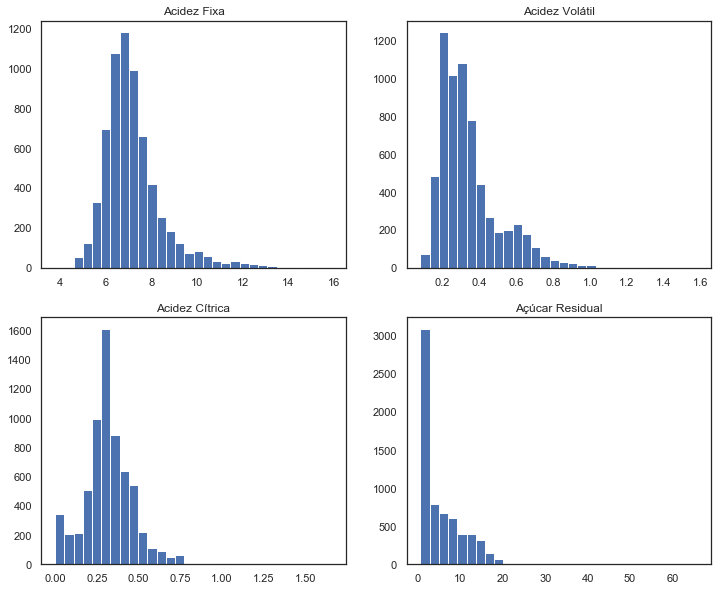

In [7]:

fig = plt.figure(figsize=(12,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.hist( df_wine.fixed_acidity, bins=30)
ax2.hist( df_wine.volatile_acidity, bins=30)
ax3.hist( df_wine.citric_acid, bins=30)
ax4.hist( df_wine.residual_sugar, bins=30);

ax1.set_title("Acidez Fixa")
ax2.set_title("Acidez Volátil")
ax3.set_title("Acidez Cítrica")
ax4.set_title("Açúcar Residual");

In [8]:
colunas = ["fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar"]

for x in colunas:
    skew = df_wine[x].skew()
    print("A simetria de {} é {}.".format(x, round(skew,2)))

A simetria de fixed_acidity é 1.72.
A simetria de volatile_acidity é 1.5.
A simetria de citric_acid é 0.47.
A simetria de residual_sugar é 1.44.


Analisando as variáveis acima:

**Acidez fixa**: Trata-se de uma distribuição assimétrica positiva, isso indica que sua média é maior que sua mediana e como vimos quando usamos o método describe, a média desse atributo é de 7.22 e a mediana é 7. O valor de assimetria é de 1.72, mostrando uma leve assimetria positiva;

**Acidez volátil**: Trata-se de uma variável com assimetria positiva leve, média de 0.34 e mediana de 0.29, dessa forma seu valor de assimetria é 1.5.

**Acidez Cítrica**: A distribuição dessa variável é quase normal. O valor de assimetria é de 0.47, isso indica que os valores de média e mediana estão muito próximos. Média 0.32, contra uma mediana de 0.31.

**Açúcar Residual**: Mais uma variável com assimetria positiva (1.44), média de 5.44 e mediana de 3.00. 

Vamos buscar outliers neste grupo de variáveis. Para isso podemos usar gráficos de boxplot.

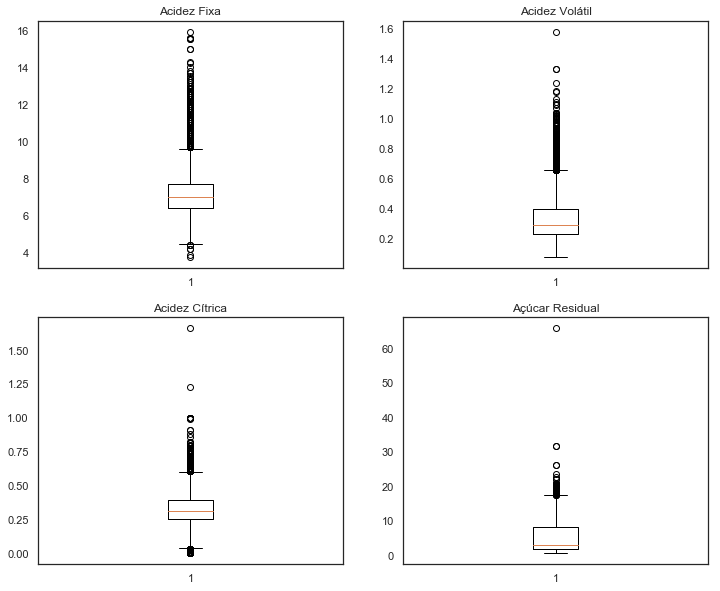

In [9]:
fig = plt.figure(figsize=(12,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.boxplot( df_wine.fixed_acidity)
ax2.boxplot( df_wine.volatile_acidity)
ax3.boxplot( df_wine.citric_acid)
ax4.boxplot( df_wine.residual_sugar);

ax1.set_title("Acidez Fixa")
ax2.set_title("Acidez Volátil")
ax3.set_title("Acidez Cítrica")
ax4.set_title("Açúcar Residual");

Todas as variáveis possuem outliers. Vamos analisar o próximo grupo de variáveis:

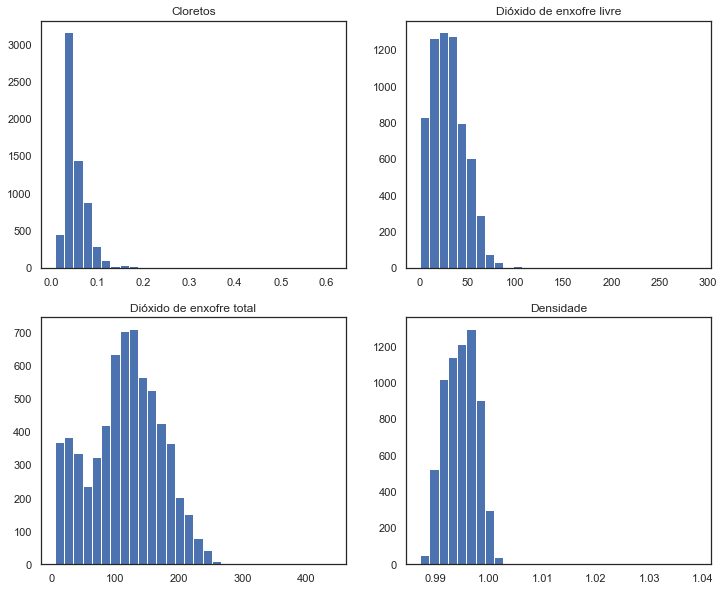

In [10]:


fig = plt.figure(figsize=(12,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.hist( df_wine.chlorides, bins=30)
ax2.hist( df_wine.free_sulfur_dioxide, bins=30)
ax3.hist( df_wine.total_sulfur_dioxide, bins=30)
ax4.hist( df_wine.density, bins=30);

ax1.set_title("Cloretos")
ax2.set_title("Dióxido de enxofre livre")
ax3.set_title("Dióxido de enxofre total")
ax4.set_title("Densidade");

In [11]:
colunas = ['chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density' ]

for x in colunas:
    skew = df_wine[x].skew()
    print("A simetria de {} é {}.".format(x, round(skew,2)))

A simetria de chlorides é 5.4.
A simetria de free_sulfur_dioxide é 1.22.
A simetria de total_sulfur_dioxide é -0.0.
A simetria de density é 0.5.


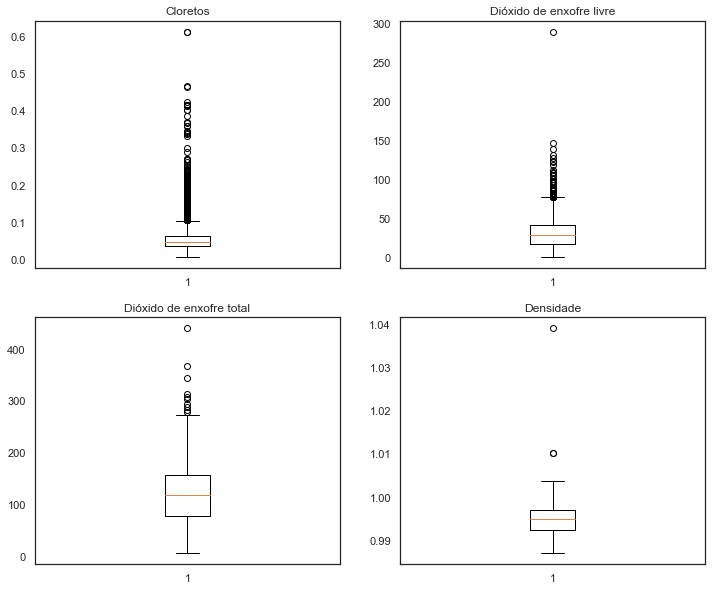

In [12]:
fig = plt.figure(figsize=(12,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.boxplot( df_wine.chlorides)
ax2.boxplot( df_wine.free_sulfur_dioxide)
ax3.boxplot( df_wine.total_sulfur_dioxide)
ax4.boxplot( df_wine.density);

ax1.set_title("Cloretos")
ax2.set_title("Dióxido de enxofre livre")
ax3.set_title("Dióxido de enxofre total")
ax4.set_title("Densidade");

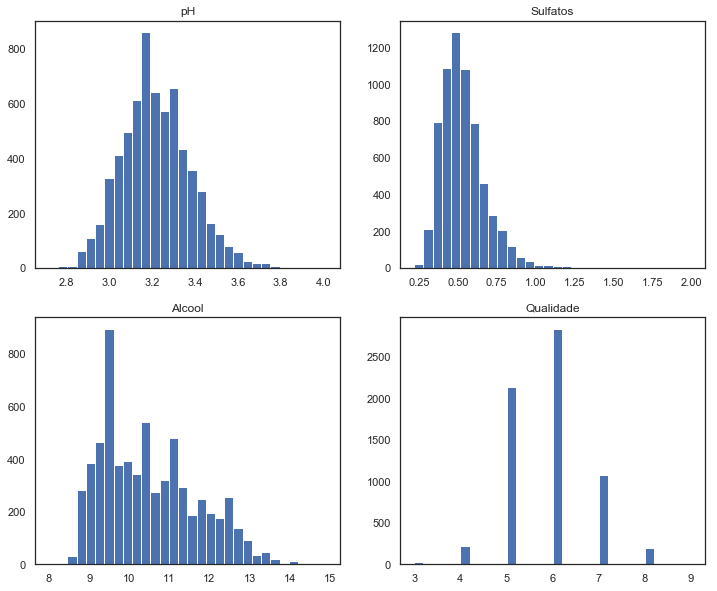

In [13]:


fig = plt.figure(figsize=(12,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.hist( df_wine.pH, bins=30)
ax2.hist( df_wine.sulphates, bins=30)
ax3.hist( df_wine.alcohol, bins=30)
ax4.hist( df_wine.quality, bins=30);

ax1.set_title("pH")
ax2.set_title("Sulfatos")
ax3.set_title("Alcool")
ax4.set_title("Qualidade");

In [14]:
colunas = ['pH', 'sulphates', 'alcohol', 'quality' ]

for x in colunas:
    skew = df_wine[x].skew()
    print("A simetria de {} é {}.".format(x, round(skew,2)))

A simetria de pH é 0.39.
A simetria de sulphates é 1.8.
A simetria de alcohol é 0.57.
A simetria de quality é 0.19.


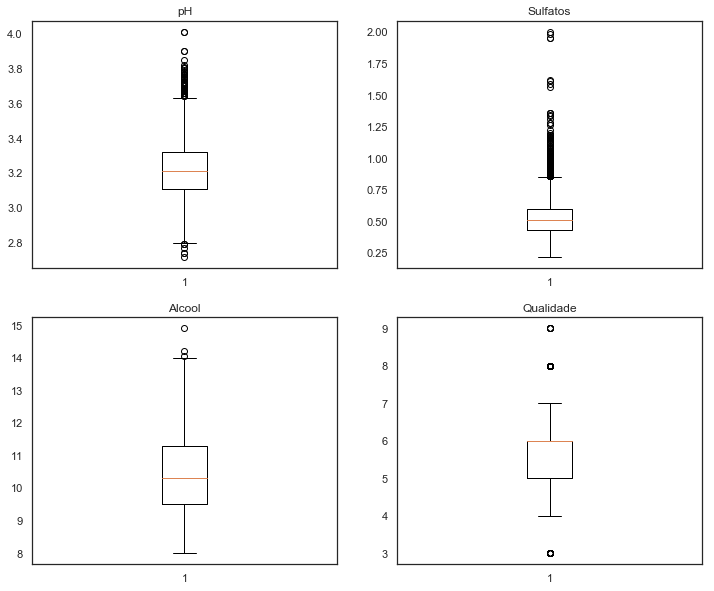

In [15]:
fig = plt.figure(figsize=(12,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.boxplot( df_wine.pH)
ax2.boxplot( df_wine.sulphates)
ax3.boxplot( df_wine.alcohol)
ax4.boxplot( df_wine.quality);

ax1.set_title("pH")
ax2.set_title("Sulfatos")
ax3.set_title("Alcool")
ax4.set_title("Qualidade");

## Conclusão da análise univariada

* Todas as variáveis possuem outliers;

* Todas tem assimetria positiva, o que indica que suas médias são superiores a suas medianas;

* A maior parte das distribuições está próxima à uma distribuição normal.

Como vimos anteriormente, é importante para o nosso algoritmo que as variáveis tenham uma distribuição normal. Olhando para os gráficos, as variáveis pH, Densidade e Acidez Cítrica parecem ter uma distribuição normal. Entretanto só parecer não é suficiente quando se trata de modelagem. Precisamos ter um dado mais confiável do que nossa intuição. Por isso iremos testar a hipótese dessas distribuições serem normais, aqui usaremos o teste de [Shapiro-Wilk](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test).

Este teste assume a hipótese nula (H0) de que a distribuição de uma variável contínua provém de uma população com ditribuição normal. No nosso teste assumiremos um nível de confiança de 0.95. A interpretação do teste se dá na leitura do valor p (*p-value*), caso este seja superior a 0.05 podemos aceitar a hipótese nula de que a variável observada possui uma distribuiçao normal. 

Vamos ao teste:

## Teste Shapiro-Wilk

* H0(hipótese nula): As distribuições **são** normais;


* H1(hipóteses alternativa): As distribuições **não são** normais.


* Nível de significância: 5%

In [16]:
import scipy
from scipy.stats import shapiro
from plotly.tools import FigureFactory as FF

cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

for x in cols:
    test = df_wine[x]
    shapiro_results = scipy.stats.shapiro(test)
    matrix_sw = [
    ['', 'Amostra', 'Test Statistic', 'p-value'],
    [x, len(test) - 1, shapiro_results[0], shapiro_results[1]]]

    shapiro_table = FF.create_table(matrix_sw, index=True)

    print(iplot(shapiro_table))

None


None


None


None


None


None


None


None


None


None


None


De acordo com os resultados do teste, nenhuma das variáveis possui distribuição normal, pois em todos os casos, o valor de p ficou inferiro a 0.05. Dessa forma, rejeitamos a hipótese nula e assumimos que as distribuições não são normais. Vamos fazer um teste mais visual, vamos usar o QQ-Plot. 

## QQ Plot

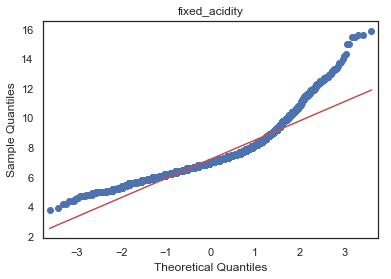

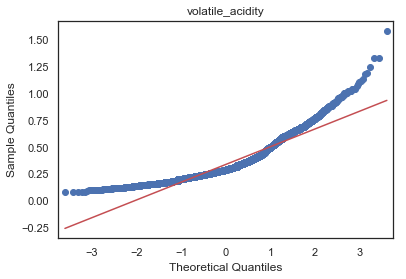

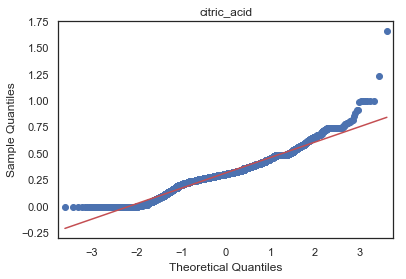

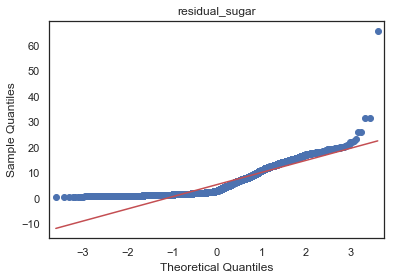

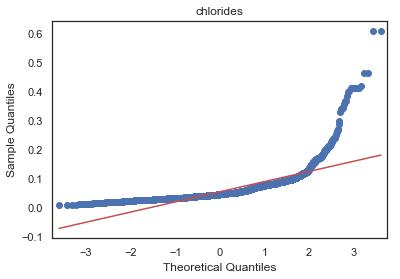

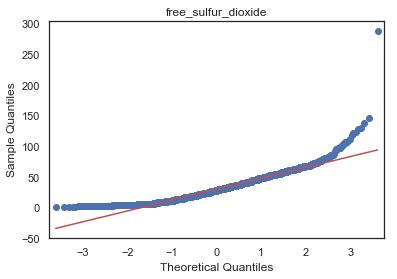

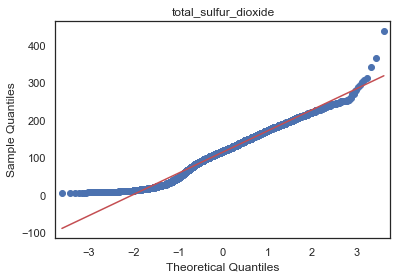

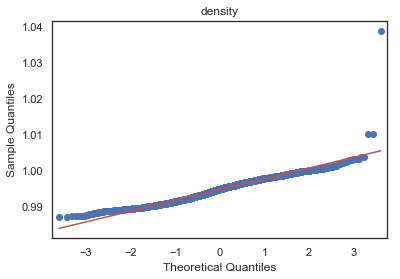

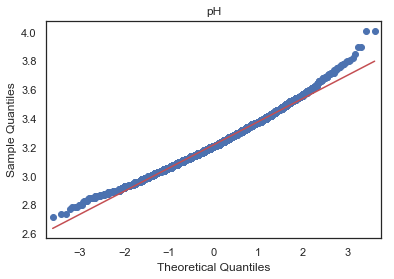

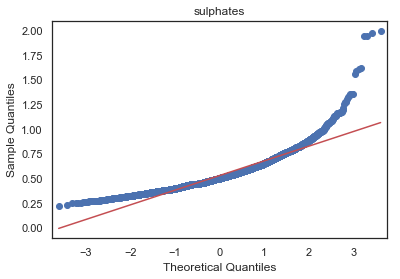

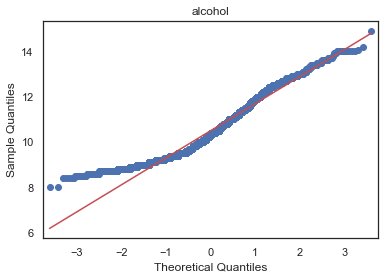

In [17]:
from statsmodels.graphics.gofplots import qqplot

cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

for x in cols:
    test = df_wine[x]
    qqplot(test, line="s")
    plt.title(x)

Neste teste, os pontos precisam se encaixar na linha diagonal da plotagem, para que possamos considerar a ditribuição da variável como sendo uma gaussina. Como vemos os dados não se encaixam perfeitamente na linha, o que é mais uma evidência que não estamos lidando com dados normalmente distribuídos. Possivelmente isso ocorre devido à presença de outliers.

Para lidar com os outliers, temos algumas abordagens possíveis:

1. A mais simples é excluir os outliers, entretanto essa não é muito recomendada, pois podemos perder informações;

2. Transformar os dados, como estamos falando de valores de variáveis contínuas, podemos transformar os dados em categóricos. Podemos dividir os dados em faixas.

Por enquanto vamos seguir a análise considerando os outliers, não vamos transformá-los e nem excluí-los neste momento.

# Análise Bi-Variada

Vamos analisar como as variáveis se relacionam entre si. Podemos começar analisando a correlação entre as variáveis usando um *heatmap*, iremos usar o coeficiente de correlação de *Pearson*. Em seguida podemos usar a função `pairplot` do seaborn, para vermos essa relação graficamente.

## Coeficientes de correlação

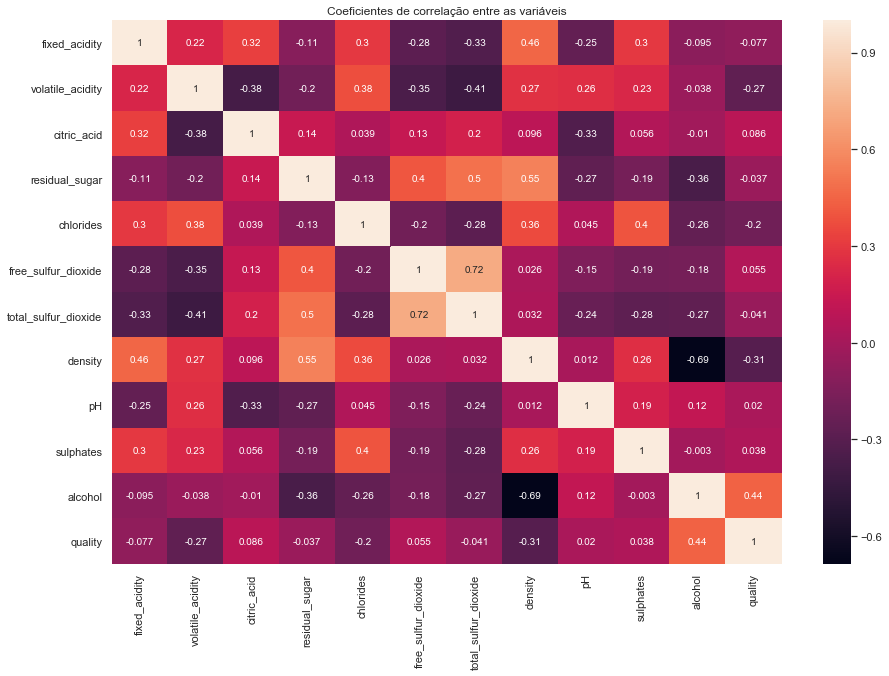

In [18]:
corr_wine = df_wine.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_wine, annot=True)
plt.title("Coeficientes de correlação entre as variáveis");

## Matriz de dispersão

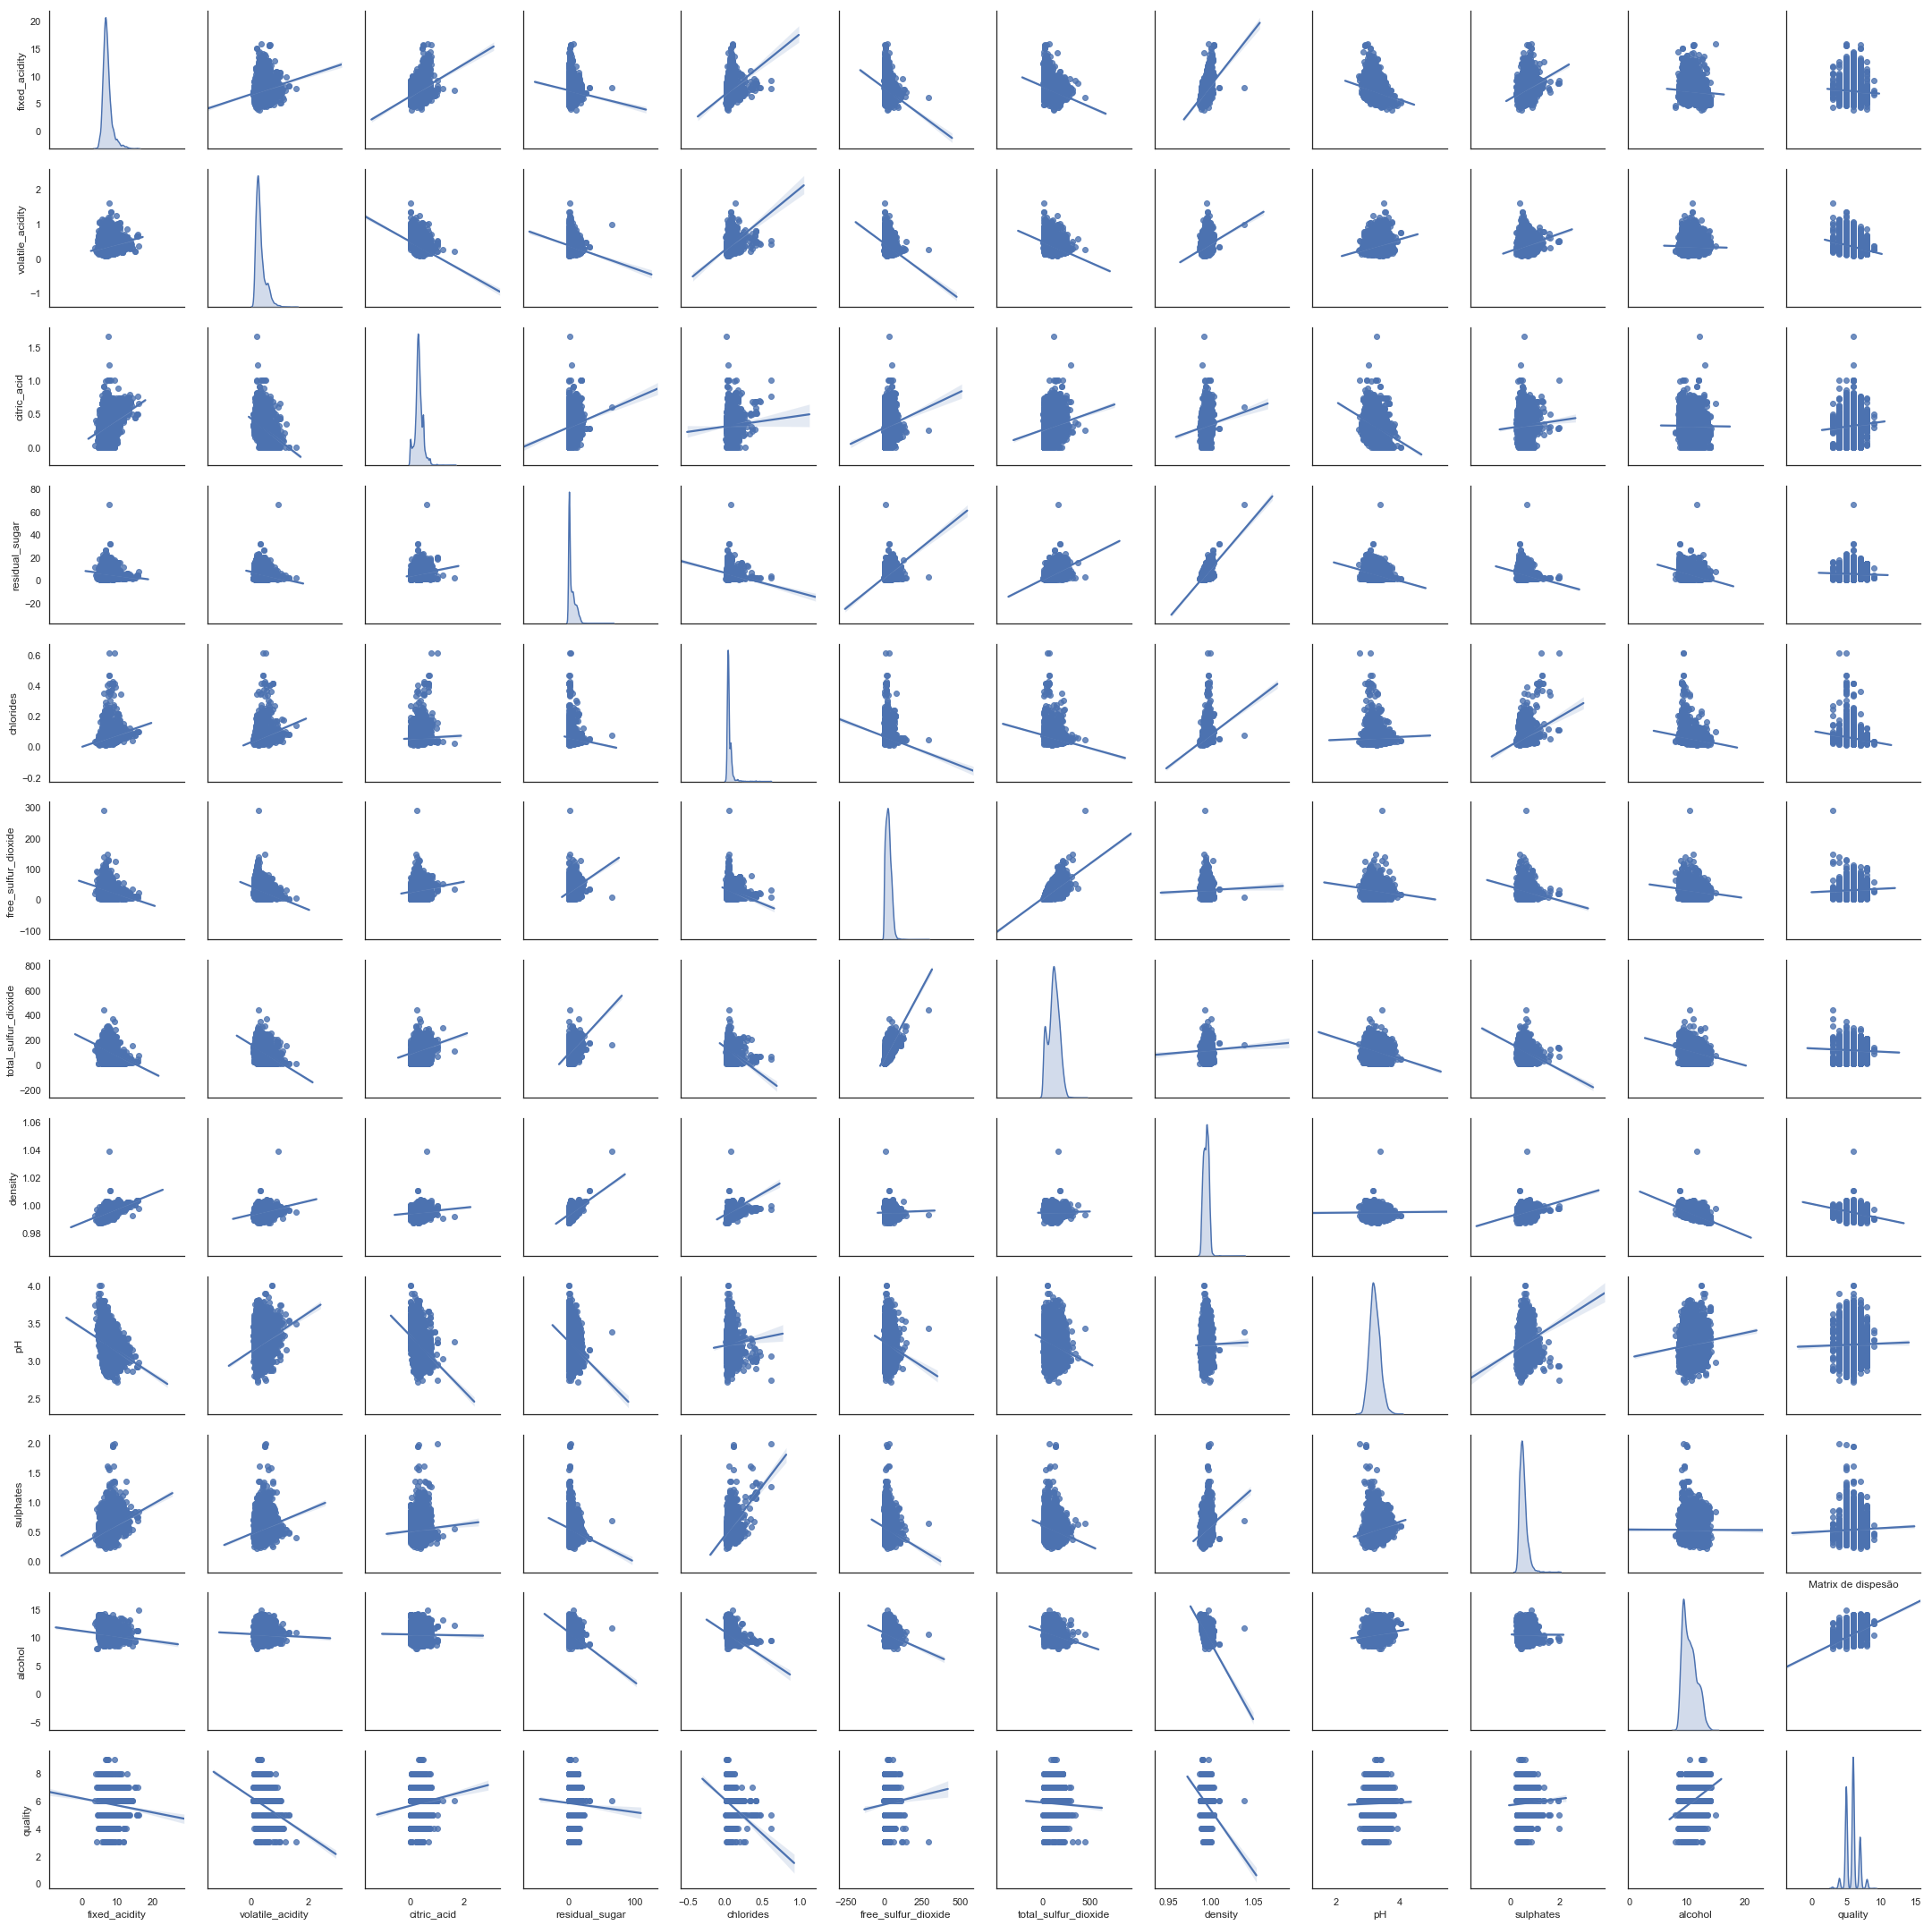

In [19]:
sns.pairplot(df_wine, diag_kind='kde', kind='reg')
plt.title("Matrix de dispesão");

A matriz de correlação nos mostra como as variáveis se correlacionam entre si. Os gráficos na diagonal represetam a distribuição de cada uma das variáveis. Como já vimos suas distribuições através de histogramas, decidi usar o argumento `diag_kind="kde"` para plotar uma gráfico de estimativa de densidade. Também usei o argumento `kind="reg"` para que o seaborn trace uma linha de regressão nos gráficos de dispersão, isso nos da maior confiança para concluir os tipos de relações entre as variáveis.

## Conclusão da análise bi-variada

* De acordo com os gráficos acima as variáveis que mais influenciam na qualidade dos vinhos são "alcool", de forma positiva, o que sugere que quanto maior o teor alcoolico, mais bem avaliado é o vinho. De forma negativa, vemos a densidade influenciando de forma negativa a qualidade, quanto menos denso, menor a qualidade. Entretando para termos mais confiança nessas afoirmações, podemos realizar alguns testes para validar a nossa hipóteses. 


# Testes de hipótese 1: O teor alcoólico, influencia na qualidade do vinho?

Queremos saber se o alcool tem relação significativa com a qualidade do vinho. Já vimos que alcool e qualidade tem um coeficiente de correlação fraco de 0.44, mas agora pretendemos avaliar se essa relação tem significância estatística. 

Para isso, iremos usar um análise de regressão linear. 

# Pre-processamento

Acredito que já conhecemos o conjunto de dados o suficiente para iniciar o processo de preparação para aplicação do algoritmo. Como vimos nossas variáveis não estão normalmente distribuídas e temos uma variável categórica (cor do vinho). Além disso, detectamos uma significante quantidade de outliers.

Considerando que o algoritmo K-Means faz uso da Distância Euclidiana, penso que uma abordagem adequada é analisar os outliers mais de perto e determinar se eles ficarão ou não no conjunto de dados, pois acredito que os outliers podem afetar negativamente o cálculo da função de distância, levando a agrupamentos não tão úteis.

Também precisamos lidar com as variáveis categóricas pois os algoritmos de aprendizado de máquina precisam ser alimentados com números. Além disso, é uma boa abordagem normalizar os dados, colocando-os em uma mesma escala.

Então o pré-processamento se dará nas seguintes etapas:

1. Análise e tratamento dos outliers;

2. Normalização das variáveis;

3. Variáveis dummy.

